In [1]:
#Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
#Import db configuration
from ipython_config import user
from ipython_config import pswd
from ipython_config import host
from ipython_config import db

In [3]:
#Creating an engine to connect to postgresql db
engine = create_engine(f'postgresql+psycopg2://{user}:{pswd}@{host}/{db}')
connect = engine.connect()

In [4]:
#Getting the salaries data into pandas dataframe
salaries_df = pd.read_sql('SELECT * FROM salaries', connect)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


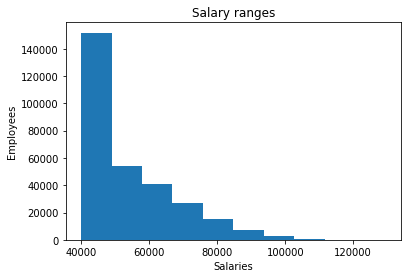

In [5]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.hist(salaries_df['salary'])
plt.title('Salary ranges')
plt.xlabel('Salaries')
plt.ylabel('Employees')
plt.show()

In [6]:
#Create a bar chart of average salary by title.
titles_df = pd.read_sql('SELECT * FROM titles', connect)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
merged_df = salaries_df.merge(titles_df, how='left', on='emp_no')
merged_df.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


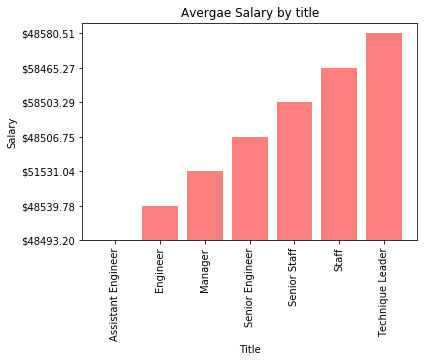

In [8]:
avg_df = merged_df.groupby(['title'],as_index=False)['salary'].mean()
avg_df['salary'] = avg_df['salary'].map("${:.2f}".format)
plt.bar(avg_df['title'], avg_df['salary'], color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.title('Avergae Salary by title')
plt.ylabel('Salary')
plt.xlabel('Title')
plt.show()